In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np
%matplotlib inline
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Empolyee Attrition').getOrCreate()
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType

from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals()) 

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df . shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

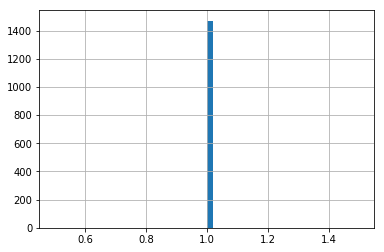

In [8]:
df['EmployeeCount'] . hist(bins=50)

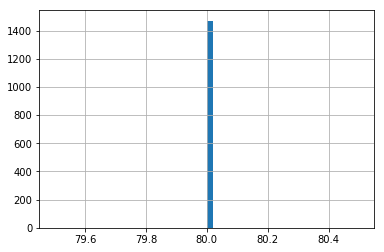

In [9]:
df['StandardHours'] . hist(bins=50)

In [10]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

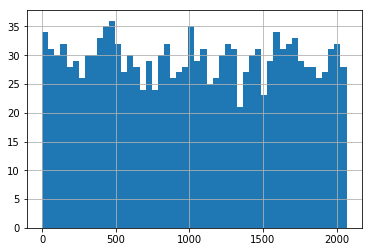

In [11]:
df['EmployeeNumber'] . hist(bins=50)

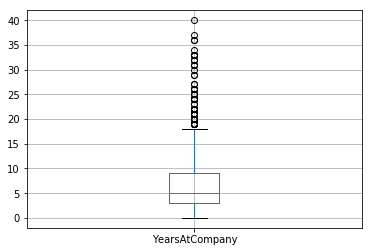

In [12]:
df.boxplot(column='YearsAtCompany')

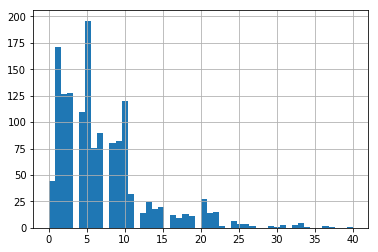

In [13]:
df['YearsAtCompany'] . hist(bins=50)

In [14]:
df['Attrition'].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [15]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0.5,1,'Attrition')

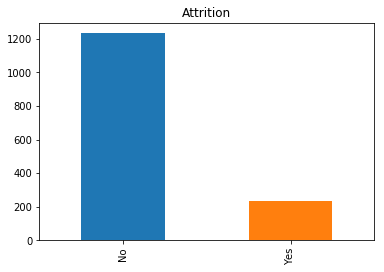

In [16]:
df.Attrition.value_counts().plot(kind='bar', alpha=1)
mpl.title("Attrition")

In [17]:
df = df.drop(['EmployeeCount','EmployeeNumber','StandardHours', 'Over18'],1,errors='ignore')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
df.isnull().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Text(0,0.5,'Frequency of Attrition')

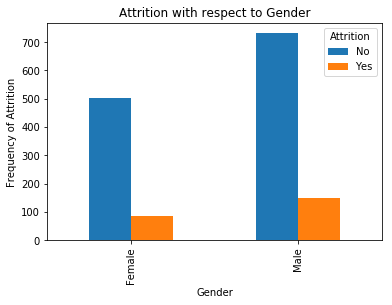

In [20]:
pd.crosstab(df.Gender,df.Attrition).plot(kind='bar')
mpl.title('Attrition with respect to Gender')
mpl.xlabel('Gender')
mpl.ylabel('Frequency of Attrition')

Text(0.5,1,'Attrition')

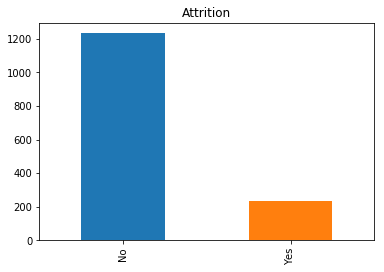

In [21]:
df.Attrition.value_counts().plot(kind='bar', alpha=1)
mpl.title("Attrition")

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

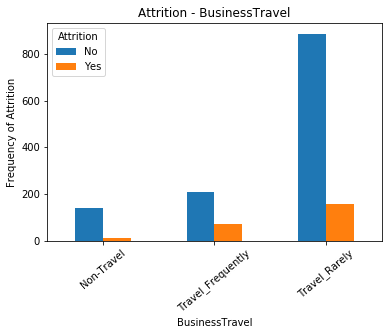

In [22]:
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar')
mpl.title('Attrition - BusinessTravel')
mpl.xlabel('BusinessTravel')
mpl.ylabel('Frequency of Attrition')
mpl.xticks(rotation=40)

Text(0,0.5,'Frequency of Attrition')

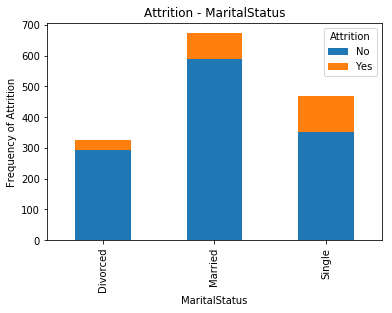

In [23]:
pd.crosstab(df['MaritalStatus'],df['Attrition']).plot(kind='bar', stacked=True)
mpl.title('Attrition - MaritalStatus')
mpl.xlabel('MaritalStatus')
mpl.ylabel('Frequency of Attrition')

Text(0,0.5,'Frequency of Attrition')

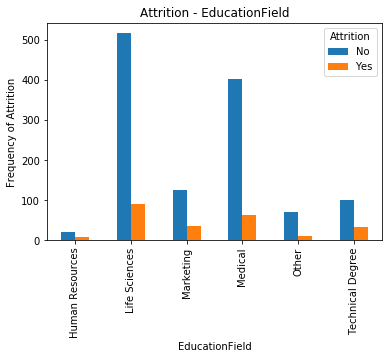

In [24]:
pd.crosstab(df['EducationField'],df['Attrition']).plot(kind='bar',stacked=False)
mpl.title('Attrition - EducationField')
mpl.xlabel('EducationField')
mpl.ylabel('Frequency of Attrition')

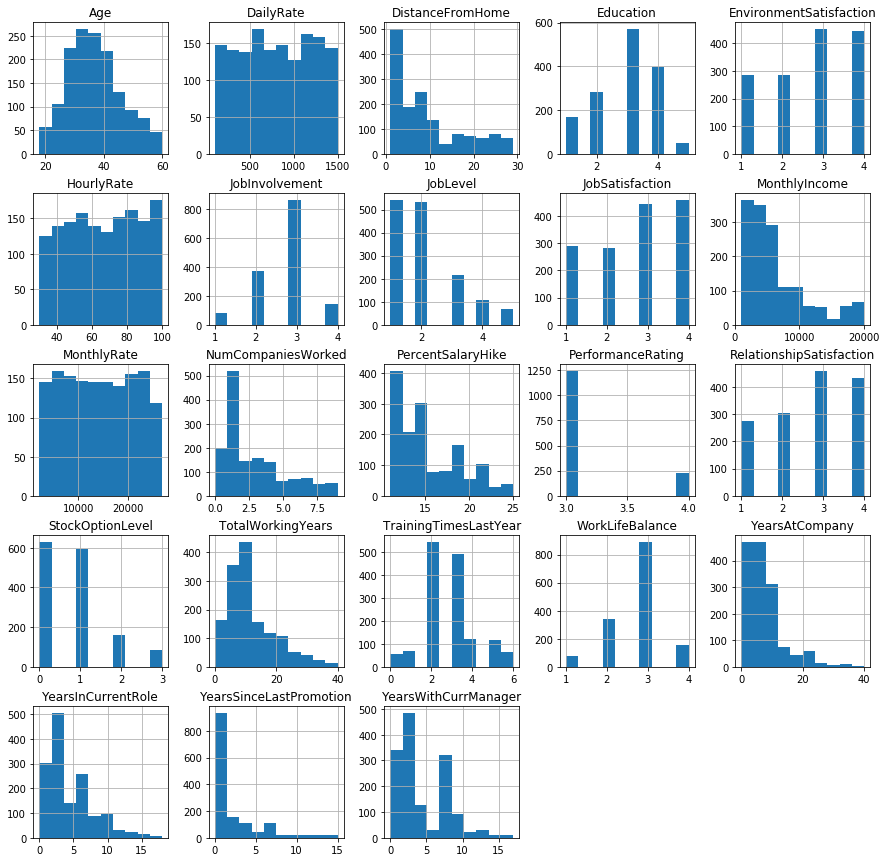

In [25]:
df.select_dtypes(include=['int64']).columns
df.hist(figsize=(15,15))
mpl.show()

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [27]:
newdata = pd.concat([df[df.Attrition == 'Yes'], df[df.Attrition == 'Yes'],df[df.Attrition == 'Yes'],
                     df[df.Attrition == 'Yes'],
           df[df.Attrition == 'Yes'],df[df.Attrition == 'No']])
newdata . shape


(2418, 31)

Text(0.5,1,'Attrition')

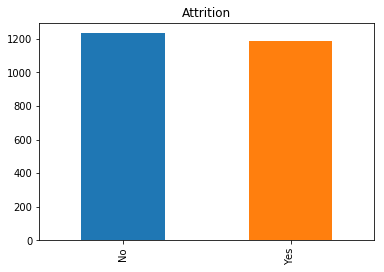

In [28]:
newdata.Attrition.value_counts().plot(kind='bar', alpha=1)
mpl.title("Attrition")

In [29]:
sp = spark.createDataFrame(newdata)

In [30]:
sp.show(3)


+---+---------+--------------+---------+--------------------+----------------+---------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPromotion|YearsWithCurrManager|
+---+---------+---------

In [31]:
sp.printSchema()

root
 |-- Age: long (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: long (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: long (nullable = true)
 |-- Education: long (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EnvironmentSatisfaction: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: long (nullable = true)
 |-- JobInvolvement: long (nullable = true)
 |-- JobLevel: long (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: long (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: long (nullable = true)
 |-- MonthlyRate: long (nullable = true)
 |-- NumCompaniesWorked: long (nullable = true)
 |-- OverTime: string (nullable = true)
 |-- PercentSalaryHike: long (nullable = true)
 |-- PerformanceRating: long (nullable = true)
 |-- RelationshipSatisfaction: long (nullable = true)
 

In [32]:
sp = sp.withColumn("Age", sp["Age"].cast(IntegerType()))
sp = sp.withColumn("DailyRate", sp["DailyRate"].cast(IntegerType()))
sp = sp.withColumn("DistanceFromHome", sp["DistanceFromHome"].cast(IntegerType()))
sp = sp.withColumn("Education", sp["Education"].cast(IntegerType()))
sp = sp.withColumn("EnvironmentSatisfaction", sp["EnvironmentSatisfaction"].cast(IntegerType()))
sp = sp.withColumn("HourlyRate", sp["HourlyRate"].cast(IntegerType()))
sp = sp.withColumn("JobInvolvement", sp["JobInvolvement"].cast(IntegerType()))
sp = sp.withColumn("JobLevel", sp["JobLevel"].cast(IntegerType()))
sp = sp.withColumn("JobSatisfaction", sp["JobSatisfaction"].cast(IntegerType()))
sp = sp.withColumn("MonthlyIncome", sp["MonthlyIncome"].cast(IntegerType()))
sp = sp.withColumn("MonthlyRate", sp["MonthlyRate"].cast(IntegerType()))
sp = sp.withColumn("NumCompaniesWorked", sp["NumCompaniesWorked"].cast(IntegerType()))
sp = sp.withColumn("PercentSalaryHike", sp["PercentSalaryHike"].cast(IntegerType()))
sp = sp.withColumn("PerformanceRating", sp["PerformanceRating"].cast(IntegerType()))
sp = sp.withColumn("RelationshipSatisfaction", sp["RelationshipSatisfaction"].cast(IntegerType()))
sp = sp.withColumn("StockOptionLevel", sp["StockOptionLevel"].cast(IntegerType()))
sp = sp.withColumn("TotalWorkingYears", sp["TotalWorkingYears"].cast(IntegerType()))
sp = sp.withColumn("TrainingTimesLastYear", sp["TrainingTimesLastYear"].cast(IntegerType()))
sp = sp.withColumn("TrainingTimesLastYear", sp["TrainingTimesLastYear"].cast(IntegerType()))
sp = sp.withColumn("WorkLifeBalance", sp["WorkLifeBalance"].cast(IntegerType()))
sp = sp.withColumn("YearsAtCompany", sp["YearsAtCompany"].cast(IntegerType()))
sp = sp.withColumn("YearsInCurrentRole", sp["YearsInCurrentRole"].cast(IntegerType()))
sp = sp.withColumn("YearsSinceLastPromotion", sp["YearsSinceLastPromotion"].cast(IntegerType()))
sp = sp.withColumn("YearsWithCurrManager", sp["YearsWithCurrManager"].cast(IntegerType()))

In [33]:
sp.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: string (nullable = true)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- PerformanceRating: integer (nullable = true)
 |-- Relation

In [34]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('logistic_regression_adv').getOrCreate()

In [35]:
from pyspark.ml.classification import LogisticRegression

In [36]:
sp.printSchema()
print(sp.columns)

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- OverTime: string (nullable = true)
 |-- PercentSalaryHike: integer (nullable = true)
 |-- PerformanceRating: integer (nullable = true)
 |-- Relation

In [37]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

In [38]:
BusinessTravel_indexer = StringIndexer(inputCol='BusinessTravel',outputCol='BusinessTravelIndex')
Department_indexer = StringIndexer(inputCol='Department',outputCol='DepartmentIndex')
EducationField_indexer = StringIndexer(inputCol='EducationField',outputCol='EducationFieldIndex')
Gender_indexer = StringIndexer(inputCol='Gender',outputCol='Gender_Index')
JobRole_indexer = StringIndexer(inputCol='JobRole',outputCol='JobRoleIndex')
MaritalStatus_indexer = StringIndexer(inputCol='MaritalStatus',outputCol='MaritalStatusIndex')
OverTime_indexer = StringIndexer(inputCol='OverTime',outputCol='OverTimeIndex')
Attrition_indexer = StringIndexer(inputCol='Attrition',outputCol='label')


In [39]:
BusinessTravel_encoder = OneHotEncoder(inputCol='BusinessTravelIndex',outputCol='BusinessTravelVec')
Department_encoder = OneHotEncoder(inputCol='DepartmentIndex',outputCol='DepartmentVec')
EducationField_encoder = OneHotEncoder(inputCol='EducationFieldIndex',outputCol='EducationFieldVec')
Gender_encoder = OneHotEncoder(inputCol='Gender_Index',outputCol='GenderVec')
JobRole_encoder = OneHotEncoder(inputCol='JobRoleIndex',outputCol='JobRoleVec')
MaritalStatus_encoder = OneHotEncoder(inputCol='MaritalStatusIndex',outputCol='MaritalStatusVec')
OverTime_encoder = OneHotEncoder(inputCol='OverTimeIndex',outputCol='OverTimeVec')


In [40]:
assembler = VectorAssembler(inputCols=['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
                                       'HourlyRate','DailyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked',
                                       'MonthlyRate','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                                       'YearsSinceLastPromotion', 'YearsWithCurrManager','BusinessTravelVec','DepartmentVec',
                                       'EducationFieldVec','GenderVec','JobRoleVec','MaritalStatusVec','OverTimeVec'], outputCol="features")

In [41]:
from pyspark.ml import Pipeline

In [42]:
pipeline = Pipeline(stages=[BusinessTravel_indexer,Department_indexer,EducationField_indexer,Gender_indexer,JobRole_indexer,MaritalStatus_indexer, OverTime_indexer,Attrition_indexer,BusinessTravel_encoder,
                            Department_encoder,EducationField_encoder,Gender_encoder,JobRole_encoder,MaritalStatus_encoder,OverTime_encoder,assembler])
pipeline_model = pipeline.fit(sp)

In [43]:
pipe_sp = pipeline_model.transform(sp)

In [44]:
pipe_sp = pipe_sp.select('label', 'features')

In [45]:
from pyspark.ml.classification import LogisticRegression,RandomForestClassifier

In [46]:
train_data, test_data = pipe_sp.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 1911
Test Dataset Count: 507


In [47]:
lr_model = LogisticRegression(featuresCol='features',labelCol='label')

In [48]:
lr_model = lr_model.fit(train_data)

In [49]:
results = lr_model.transform(test_data)

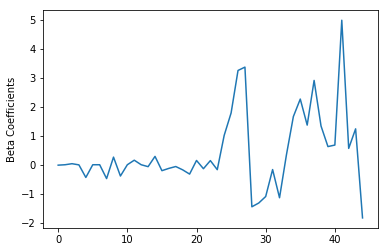

In [50]:

mpl.plot(lr_model.coefficients)
mpl.ylabel('Beta Coefficients')
mpl.show()

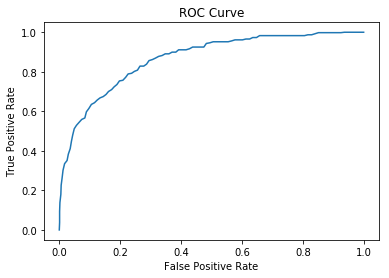

Area Under the Curve: 0.866598247924972


In [51]:
training_summary = lr_model.summary
ROC = training_summary.roc.toPandas()
mpl.plot(ROC['FPR'],ROC['TPR'])
mpl.ylabel('True Positive Rate')
mpl.xlabel('False Positive Rate')
mpl.title('ROC Curve')
mpl.show()
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

In [52]:
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [53]:
lrModel = lr.fit(train_data)

In [54]:
results = lrModel.transform(test_data)

In [55]:
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

Coefficients: 
1 X 45 CSRMatrix

Intercept: [-0.04501021381394013]


In [56]:
#Decision tree and Random forest 

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [57]:
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features",
                            maxDepth=5, maxBins=32, minInstancesPerNode=1, minInfoGain=0.0, maxMemoryInMB=256, 
                            cacheNodeIds=False, checkpointInterval=10, impurity="gini", seed=None)
dt_model = dt.fit(train_data)

In [58]:
predictions = dt_model.transform(test_data)
predictions.select("prediction", "label", "features").show()
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuray = %g " %accuracy)
print("Test Error = %g " % (1.0 - accuracy))

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
+----------+-----+--------------------+
only showing top 20 rows

Accuray = 0.79

In [59]:
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)
rf_model = rf.fit(train_data)

In [60]:
predictions = rf_model.transform(test_data)
predictions.select("prediction", "label", "features").show()
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuray = %g " %accuracy)
print("Test Error = %g " % (1.0 - accuracy))

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       1.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
|       0.0|  0.0|(45,[0,1,2,3,4,5,...|
+----------+-----+--------------------+
only showing top 20 rows

Accuray = 0.82